### Hidden Marcov Model (HMM)
####  with Pomegranate v. 1.0

HMM example: From YouTube, Normalized Nerd, Hidden Markov Model Clearly Explained! Part-5.
Pictures are from this video.

Pomegranate: Pomegranate docs by Jacob Schreiber


The weather at our friend's house in a distant country varies with probabilities according to the Markov chain below (transition matrix), but we don't know the weather at her place. Instead, because of our daily phone calls, we know her mood on any given day. We also know that the weather affects her moods with the described probabilities (emission matrix).

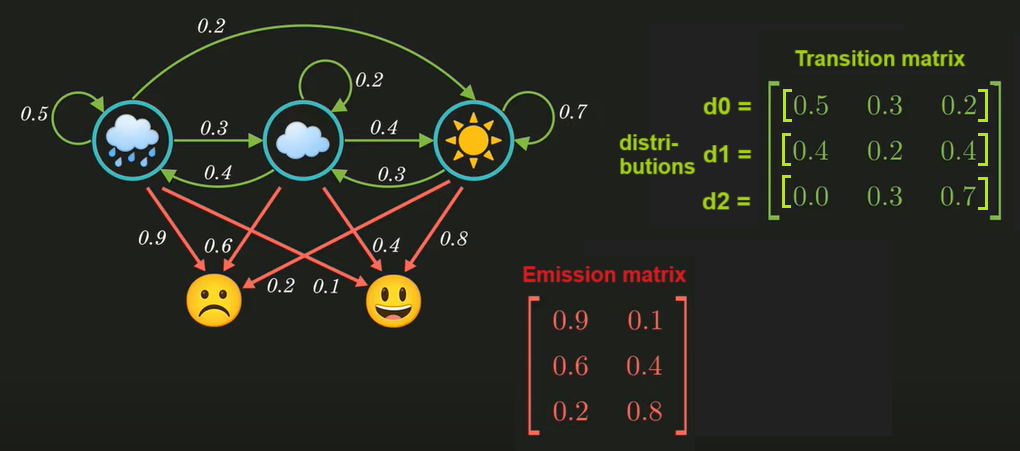

**The problem**
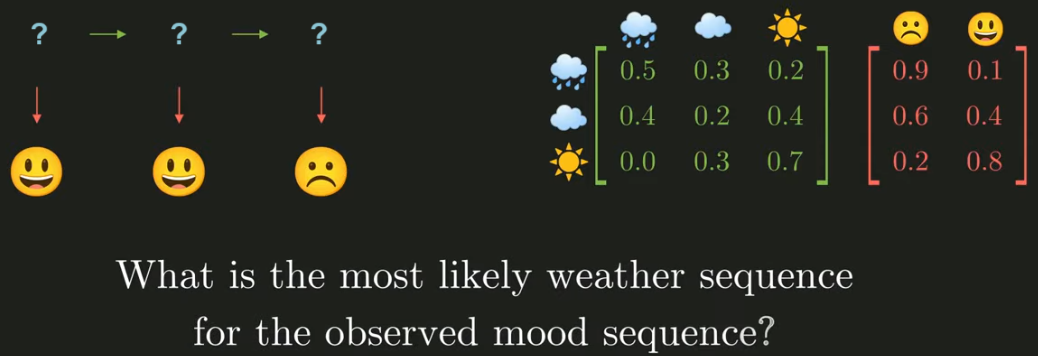

In [1]:
import seaborn; seaborn.set_style('whitegrid')
import torch

from pomegranate.bayes_classifier import BayesClassifier
from pomegranate.distributions import *

import numpy
numpy.random.seed(0)
numpy.set_printoptions(suppress=True)

%matplotlib inline 
import matplotlib.pyplot as plt


In [2]:
# The Hidden Marcov Chain Model definition

from pomegranate.distributions import Categorical
# Distributions: The emission probabilities for every weather node (emission matrix).
#          Mood:   Sad  Happy                Weather:  
d0 = Categorical([[0.9, 0.1]])           # 'Reiny day'  (0)
d1 = Categorical([[0.6, 0.4]])           # 'Cloudy day' (1)
d2 = Categorical([[0.2, 0.8]])           # 'Sunny day'  (2)

# In Pomegranate 1.0 Markov Chain nodes are defined directly from these distributions (d0,d1,d2) 
# and there is no need for explicite definitions for the nodes.

from pomegranate.hmm import DenseHMM     #  Modelling with a dense transition matrix 
model = DenseHMM()                   

# The edges of the Markov Chain are defined directly from the transition matrix.
model = DenseHMM([d0, d1, d2], edges=[[0.5, 0.3, 0.2], [0.4, 0.2, 0.4], [0.0, 0.3, 0.7]], starts=[0.218, 0.273, 0.509])
# For the start probabilities see the video.

The Hidden Marcov Chain Model is now defined.

**The Problem:** What is the most likely weather sequence for the observed mood sequence
S = 'Happy, Happy, Sad' = 'HHS' 

The weather sequence is hidden from us, but HMM calculates the most likely one.

In [116]:
# Observed three-day moods

S = 'HHS'                               # 'Happy, Happy, Sad'
# Sequence S is converted into a numerical representation  (Sad = 0, Happy = 1)
X =  numpy.array([[[['S', 'H'].index(char)] for char in S]])

print("The sequence of moods: S = {}".format(''.join(S)),'=', X[0].T)
#X.shape                                # batch_size = 1, sequence length = 3, dimensionality = 1 

The sequence of moods: S = HHS = [[1 1 0]]


In [118]:
# Prediction 

y_hat = model.predict(X)        # The most likely weather sequence numerically as torch tensor
print()
# print('y_hat =', y_hat)
print("HMM prediction of weather sequence numerically encoded:   {}".format(''.join([str(y.item()) for y in y_hat[0]])))
# '.item' extracts the value from a torch tensor

# Pomergranate gives the prediction sequence numerically encoded (according to the transition ..
# matrix vertical indeces). We convert the sequence into words:
print()
w_dict = {0: 'Reiny', 1: 'Cloudy', 2: 'Sunny'}
print('The most probable sequence of days weather explaining the observed moods is: ')
for i in range(0, len(S)):
    w = y_hat[0][i].item()   
    print( w_dict[w] , end = " ") 


HMM prediction of weather sequence numerically encoded:   221

The most probable sequence of days weather explaining the observed moods is: 
Sunny Sunny Cloudy 

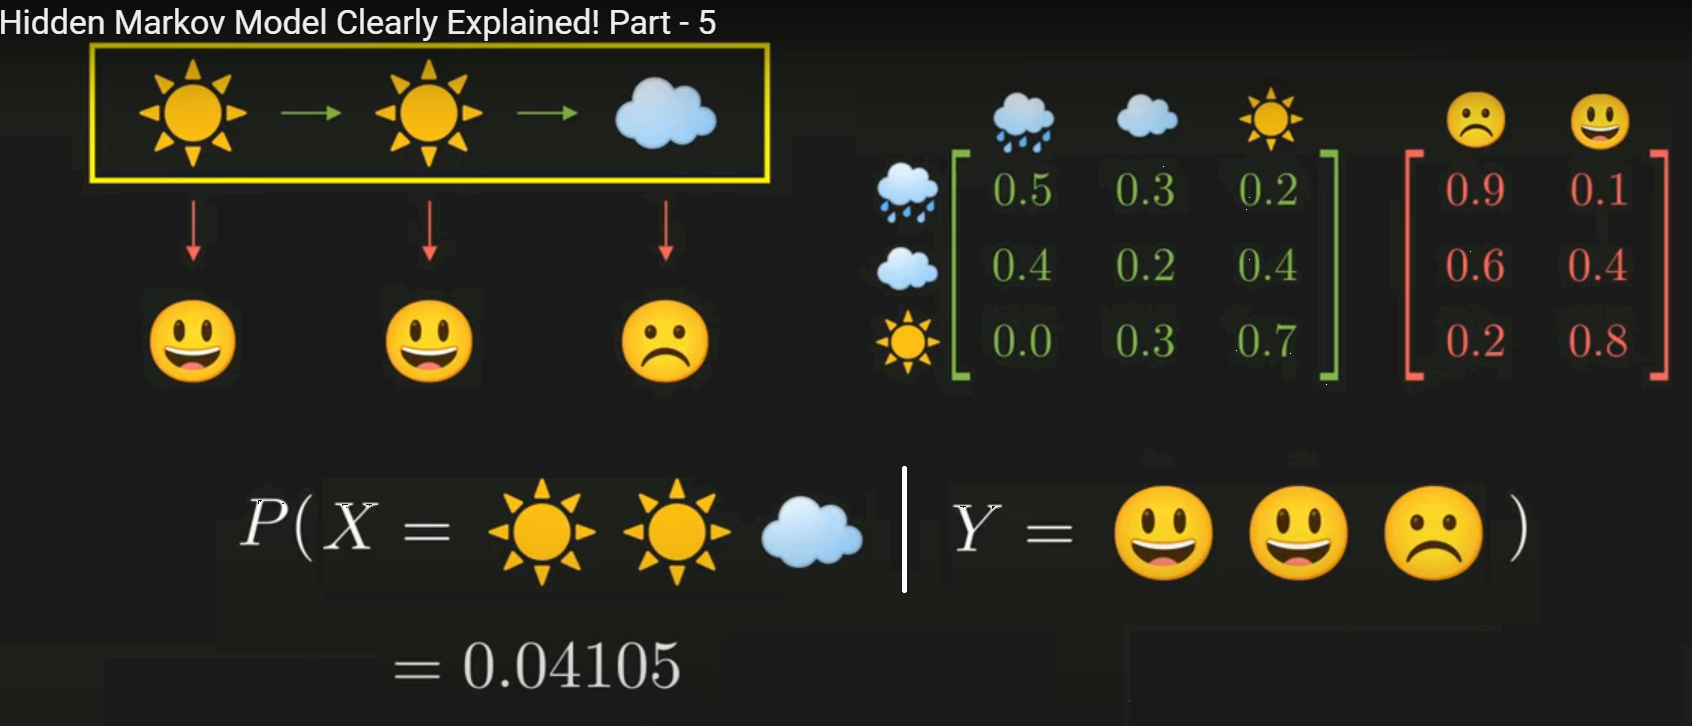

In [119]:
# The probability for the weather sequence 'Sunny Sunny Cloudy' ...
#  given the mood sequence 'Happy Happy Sad':
# P = P(Su)*P(Happy|Sun)*P(Sun|Sun)*P(Happy|Sun)*P(Clo|Sun)*P(Sad|Clo)
P = 0.509*0.8*0.7*0.8*0.3*0.6
print(round(P, 5))

0.04105


This probability is small because there are so many other weather sequeces possible for the observed mood sequence. For example $$P(Sun, Clo, Clo | Happy, Happy, Sad) = 0.509\cdot0.8\cdot0.7\cdot0.8\cdot0.2\cdot0.6 = 0.02736$$
To find the most probable weather sequence you must calculate the probablities for all such 
weather sequences and then take the Arg max.

In [97]:
# Here are the calculated the probabilities for individual moods to belong either to
# the Rainy, Cloudy or Sunny weather.
# Days run vertical. The row sum for one day probabilities is 1.
print('          Rainy  Cloudy   Sunny',)
print( model.predict_proba(X)[0][0:3])

          Rainy  Cloudy   Sunny
tensor([[0.0270, 0.1549, 0.8181],
        [0.0298, 0.2749, 0.6952],
        [0.1968, 0.4580, 0.3452]])


Heikki Miettinen 2024